<a href="https://colab.research.google.com/github/Vanesafm1/BD_iudig_films/blob/main/regresion_lineal_Sklearn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad de Aprendizaje No. 1 Regresión lineal en Sklearn
Regresión lineal en Sklearn para el conjunto de datos Fuel Consumption CO

## Objetivo de la Actividad:
En esta tarea practicarás la implementación del Análisis Exploratorio de Datos (AED) usando Pandas, la visualización de correlaciones entre variables utilizando seaborn y matplotlib, e implementarás una regresión lineal en Sklearn.

# Desglose Actividad
En reto formativo implementaste una regresión lineal en Sklearn para los datos de emisiones de
 de diferentes tipos de vehículos.

¿Qué hacer?

Implementa tu propia regresión lineal en Sklearn para el conjunto de datos Fuel Consumption CO. Descarga aquí los documentos que necesitas para esta actividad.

Sigue los pasos del ejemplo en la actividad interactiva para realizar el AED, buscar correlaciones entre las variables del conjunto de datos, escoger tus variables independientes y tu variable dependiente.

Responde: ¿Cuál variable independiente tiene mayor impacto en tu variable dependiente?

Finalmente, evalúa las métricas de tu modelo.

## Asignatura: Machine Learning
## Estudiantes: Ardys Hurtado  y Vanesa Foronda
## Ingenieria de Software y Datos
## Marzo 2025

####  En el presente  trabajo  utilizamoremos un modelo de Regresión Lineal para estimar las emisiones de CO₂ acore con el consumo de combustible y el tamaño del motor de diferentes vehiculos y sus caracteristicas.

In [ ]:
# Relizamos importancion de liberias requeridas

import pandas as pd # libreria para analisis de datos
import numpy as np # libreria para analisis de datos
import matplotlib.pyplot as plt # libreria para Visualizaciones
import seaborn as sns # libreria para Visualizaciones
from sklearn.model_selection import train_test_split # libreria para machine learning
from sklearn.linear_model import LinearRegression # libreria para machine learning
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # libreria para machine learning

# Carga de datos o Dataset
### Cargamos el conjunto de datos FuelConsumptionCo2.csv donde podremos explirar los datos de consumo de combustible.


In [ ]:
df = pd.read_csv("/Users/Vane/dev/MachineLEarning/EA1/FuelConsumptionCo2.csv")

# Exploración inicial del dataset
#### Mostramos las primeras filas para conocer la estructura de los datos

Realizamos exploracion de los datos implementando los metodos: .head()  .info() .describe()

In [ ]:
display(df.head())  # Muestra las primeras 5 registros del dataset y las columnas.
# esto nos ayuda a tener una idea general de los datos

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Mostramos información general sobre el dataset

In [ ]:

display(df.info()) # Indica informacion resumida del dataset: cuantos valores, sihay nullos, tipos de datos, cantidad de columnas, cantidad deregistros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


None

Se  realiza analisis de los datos  cn los siguientes hallazgos:
* todas las columnas son pertinentes y estan relacionadas con el caso de estudio
* No e identifican registros con datos nullos, facilitando la evaluacion del dataset y omitiendo el paso de limpiar los datos
* Si bien la mayoria de los datos podria corresponder a un tipo Float, se encuentran datos tipos object  y enteros. Este dato no representa por ahora alguna noveadd, sin embargo es apropiado tenerlo en cuentas por si a futuro se genera confllicto de tipos.


#### Resumen estadístico de las variables numéricas


In [ ]:
display(df.describe())  # Permite ver el dataset de manera estadistica (media, moda, desviacion estandar)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# Análisis de correlación
### Seleccionamos solo las columnas numéricas

In [ ]:
numeric_df = df.select_dtypes(include=[np.number]) #

# Visualizamos la matriz de correlación


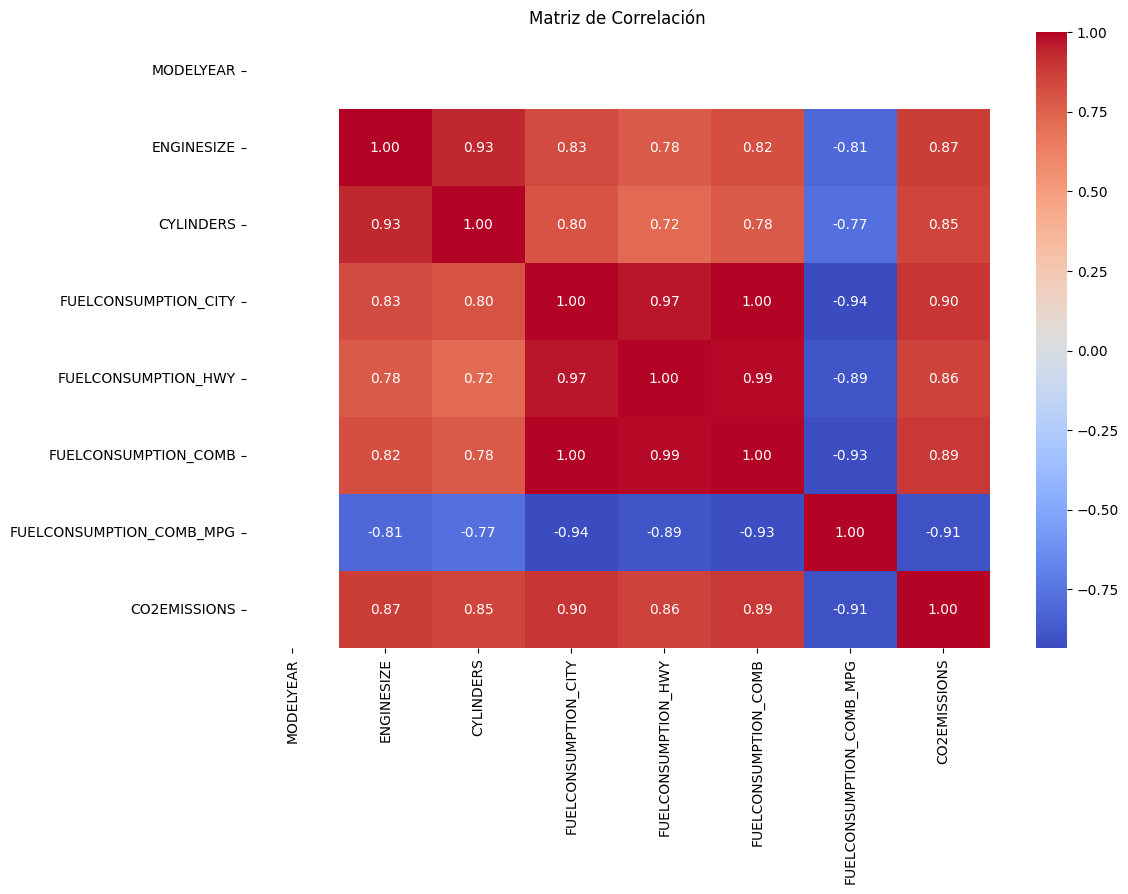

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

Encontramos alta correlacion positiva en los cruces de las variables:
.99 fuelConsumption_comb y fuelconsumption_hwy
.97 fuelconsumption_hwy  y fuelconsumption_city
Tambien encontramos una fuerte correlacion negativa en la variable fuelconsumption_comb_MPG con el resto de las variables. con una maxima de -0.93 y una minima de -0.77
Las demas cruces de las variables  tienen correlacion positiva  entre 0.72 y 0.93


# Selección de variables
### Elegimos nuestras variables independientes (X) y la variable dependiente (y)


In [ ]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
# Variables independientes, al tener la mas alta correlacion  y mayor impacto en la variable dependiente seleccionamos principalmente la variable: 'FUELCONSUMPTION_COMB'
y = df['CO2EMISSIONS'] # escogemos emisiones de CO2  como la variable dependiente

### División del dataset en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento del modelo de Regresión Lineal

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones
y_pred = modelo.predict(X_test)

# ## Evaluación del modelo y metricas


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")  # Promedio del error absoluto (qué tan lejos están las predicciones de los valores reales).
print(f"MSE: {mse:.2f}") # Similar al MAE, pero penaliza más los errores grandes.
print(f"RMSE: {rmse:.2f}") # Raíz cuadrada del MSE, útil para entender el error en la misma escala de los datos.
print(f"R^2: {r2:.2f}") # Indica qué porcentaje de la variabilidad de y explica el modelo (si es cercano a 1, es un buen modelo).

MAE: 16.69
MSE: 511.37
RMSE: 22.61
R^2: 0.88


Acorde con los resultados antereiores podrias interpretar que:
### El R² de 0.88
significa que el modelo puede explicar el 88% de la variabilidad en las emisiones de CO₂. Esto es un buen resultado, ya que indica que el modelo tiene una alta capacidad predictiva.
( Si R² estuviera más cerca de 1.0 (100%), el modelo sería aún más preciso)
( Si estuviera por debajo de 0.5 (50%), significaría que hay muchas otras variables influyendo en el resultado.)

### MAE = 16.69 → Error Promedio Bajo
El MAE de 16.69 significa que, en promedio, las predicciones del modelo tienen un error absoluto de 16.69 unidades en la variable CO2EMISSIONS.
( Si los valores reales de emisiones de CO₂ varían entre 100 y 350 g/km, un error de ±16.69 es relativamente bajo y sugiere que el modelo es bastante preciso.)

### RMSE = 22.61 → El error tiene una magnitud aceptable
El RMSE es de 22.61, lo que nos da una idea del error promedio en la misma escala que la variable objetivo (CO₂ emisiones en g/km).
* Diferencia entre MAE y RMSE:
MAE da una medida de error promedio sin importar el signo (subestima grandes errores).
RMSE penaliza los errores más grandes, haciendo que valores atípicos tengan más impacto.
Como RMSE es mayor que MAE, esto sugiere que hay algunos valores atípicos (outliers) en los datos que están generando errores más grandes de lo esperado.

NOTA: Interpretacion con apoyo parcial de AI.